# Bank Marketing Dataset - Exploratory Data Analysis

This notebook explores the Bank Marketing dataset from a Portuguese banking institution.
The goal is to predict if a client will subscribe to a term deposit based on direct marketing campaigns (phone calls).

**Dataset**: bank-additional-full.csv with social/economic context attributes
- 41,188 instances
- 20 input attributes + 1 output attribute
- Data from May 2008 to November 2010

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

## 1. Load the Dataset

In [2]:
# Load the full dataset with additional features
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (41188, 21)
Number of rows: 41,188
Number of columns: 21


## 2. Initial Data Inspection

In [3]:
# Display first few rows
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Statistical summary for numerical features
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Statistical summary for categorical features
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## 3. Missing Values Analysis

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percent
})

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Check for 'unknown' values in categorical columns
print("\n'Unknown' values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    unknown_count = (df[col] == 'unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count} ({unknown_count/len(df)*100:.2f}%)")

Missing Values Summary:
Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []

'Unknown' values in categorical columns:
job: 330 (0.80%)
marital: 80 (0.19%)
education: 1731 (4.20%)
default: 8597 (20.87%)
housing: 990 (2.40%)
loan: 990 (2.40%)


## 4. Target Variable Analysis

Target Variable (y) Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


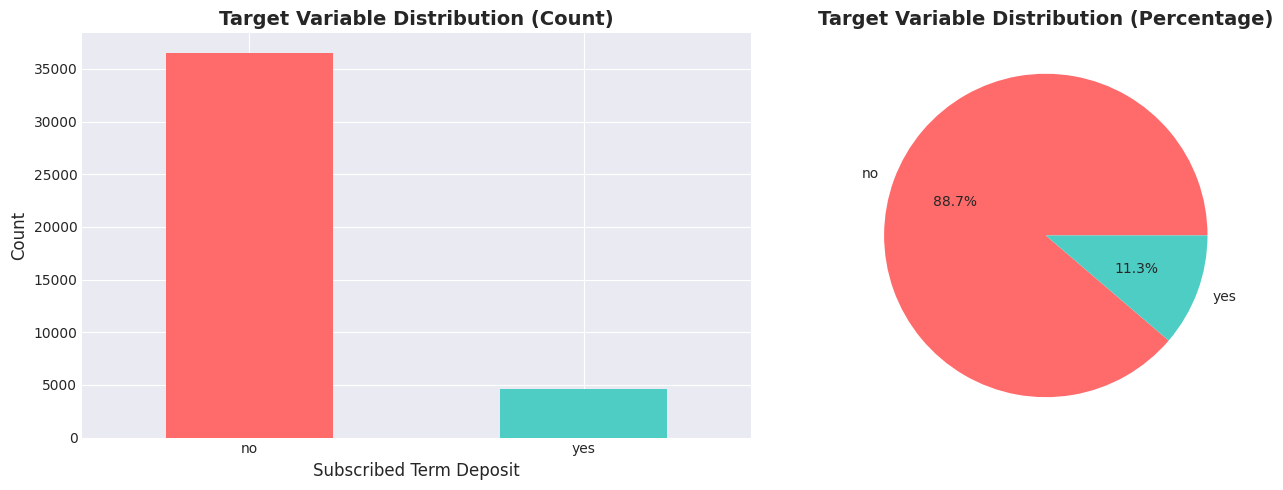


Class Imbalance Ratio (no:yes): 7.88:1


In [8]:
# Target variable distribution
print("Target Variable (y) Distribution:")
print(df['y'].value_counts())
print("\nPercentage:")
print(df['y'].value_counts(normalize=True) * 100)

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['y'].value_counts().plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Target Variable Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subscribed Term Deposit', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
df['y'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Class imbalance ratio
class_ratio = df['y'].value_counts()['no'] / df['y'].value_counts()['yes']
print(f"\nClass Imbalance Ratio (no:yes): {class_ratio:.2f}:1")

## 5. Numerical Features Analysis

In [9]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")

Numerical features (10): ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


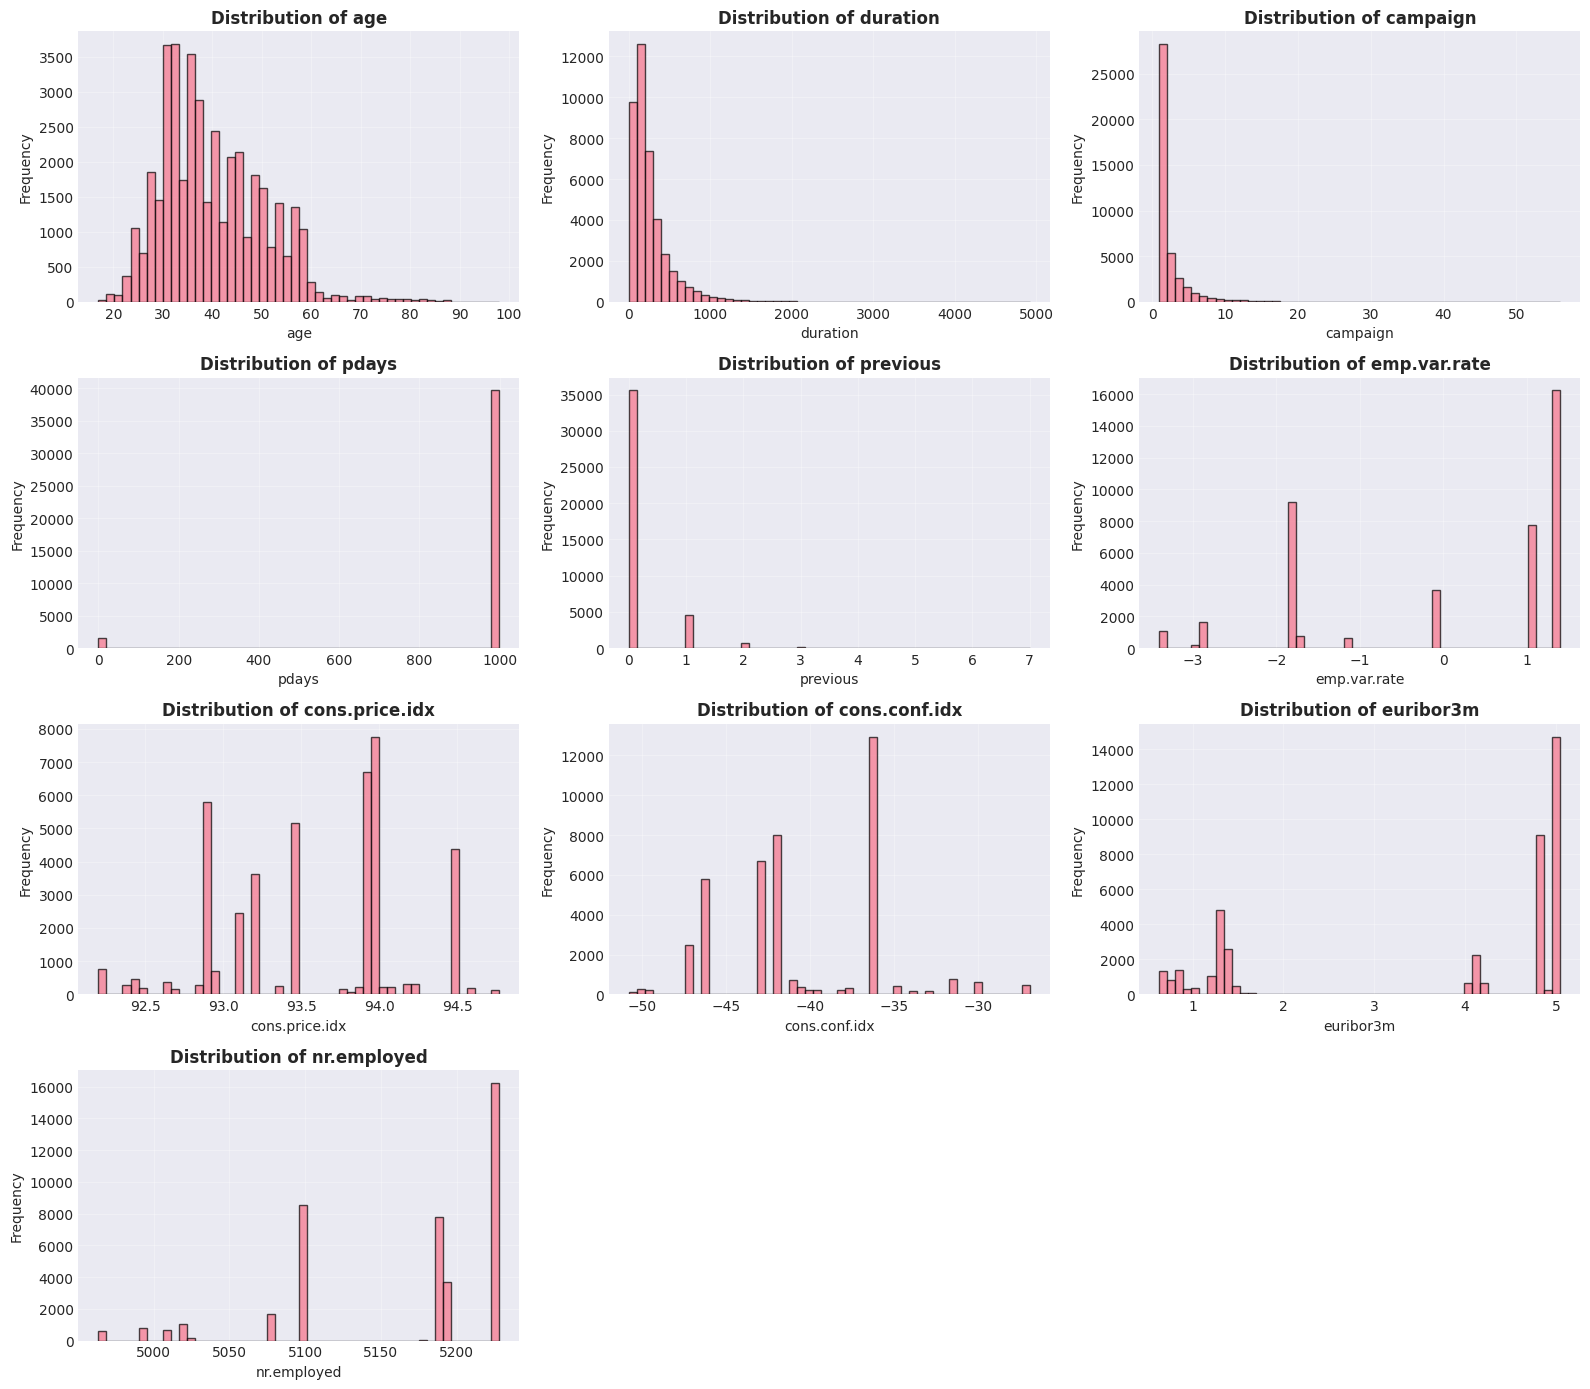

In [10]:
# Distribution of numerical features
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

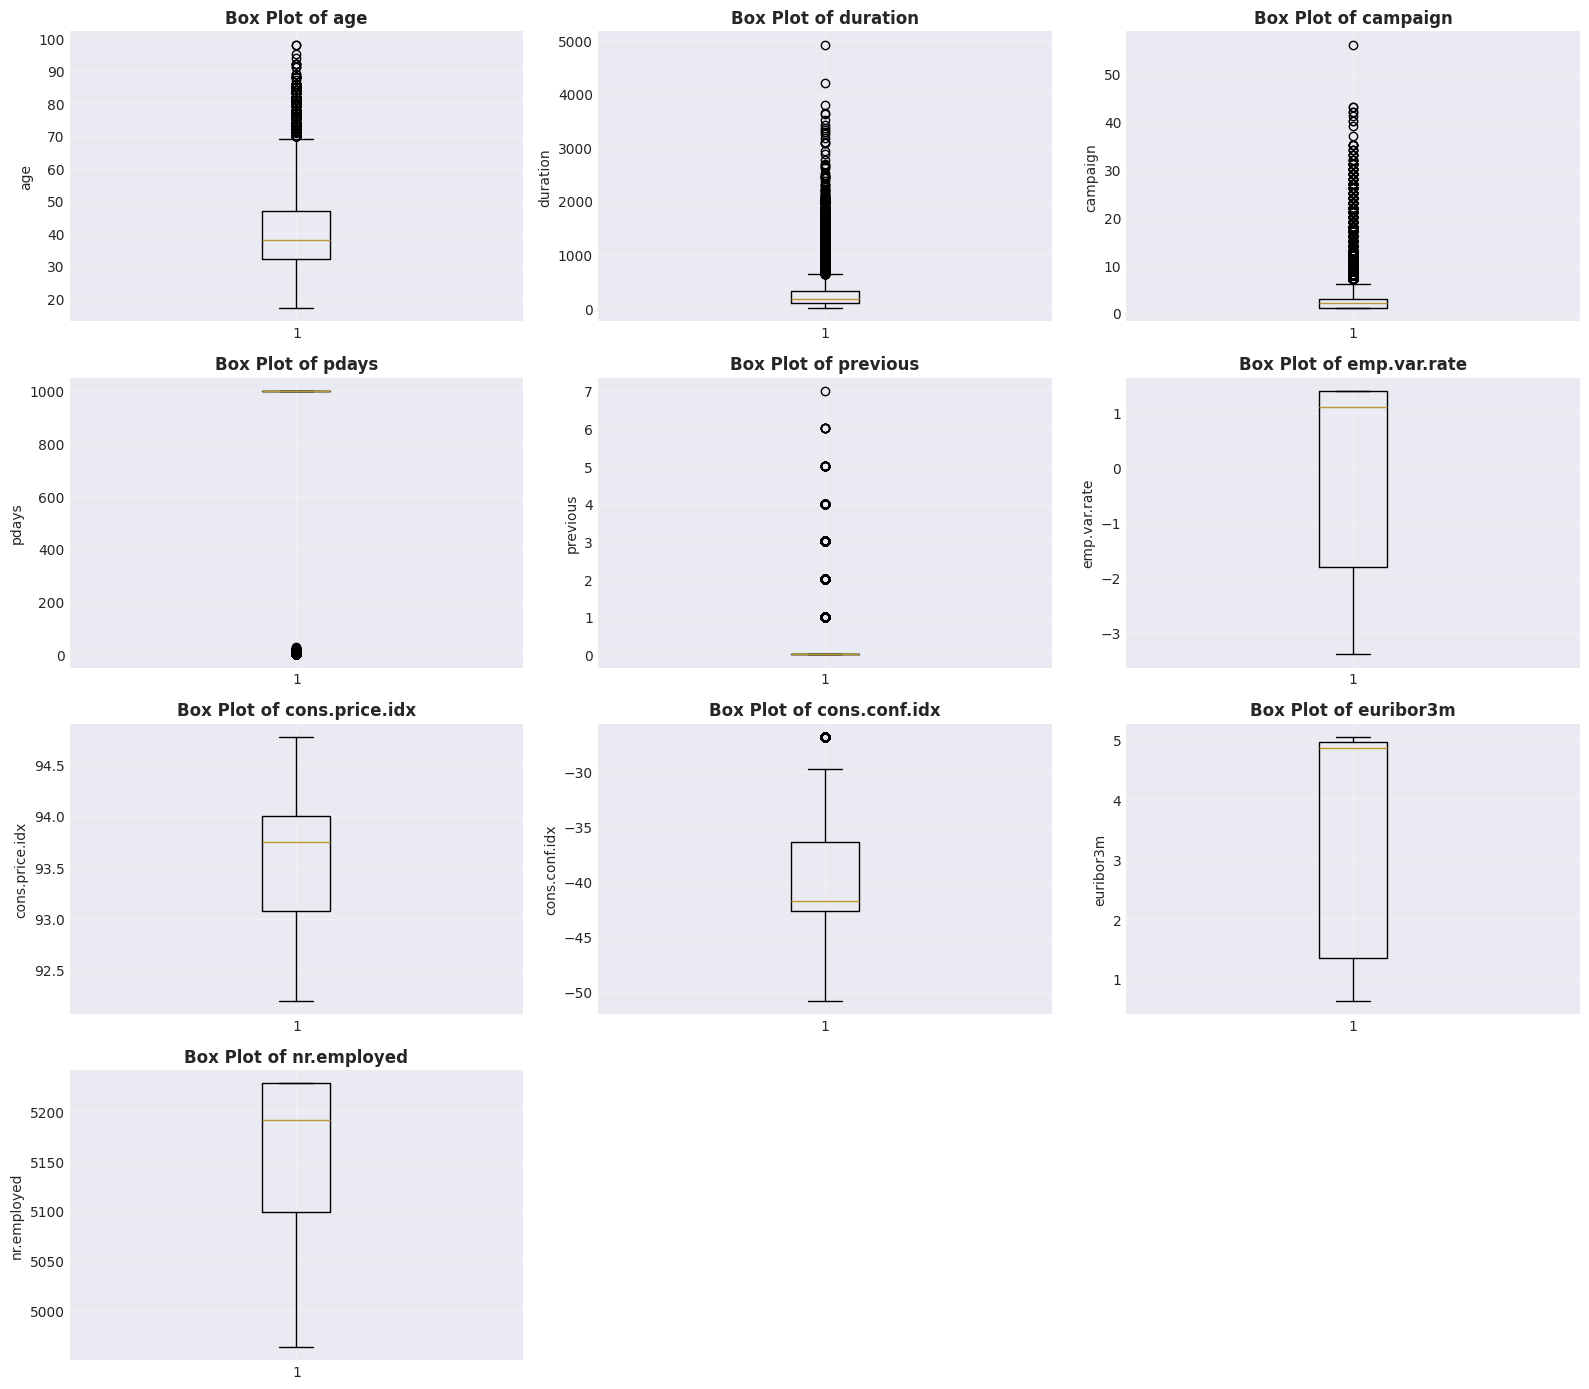

In [11]:
# Box plots for numerical features
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}', fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

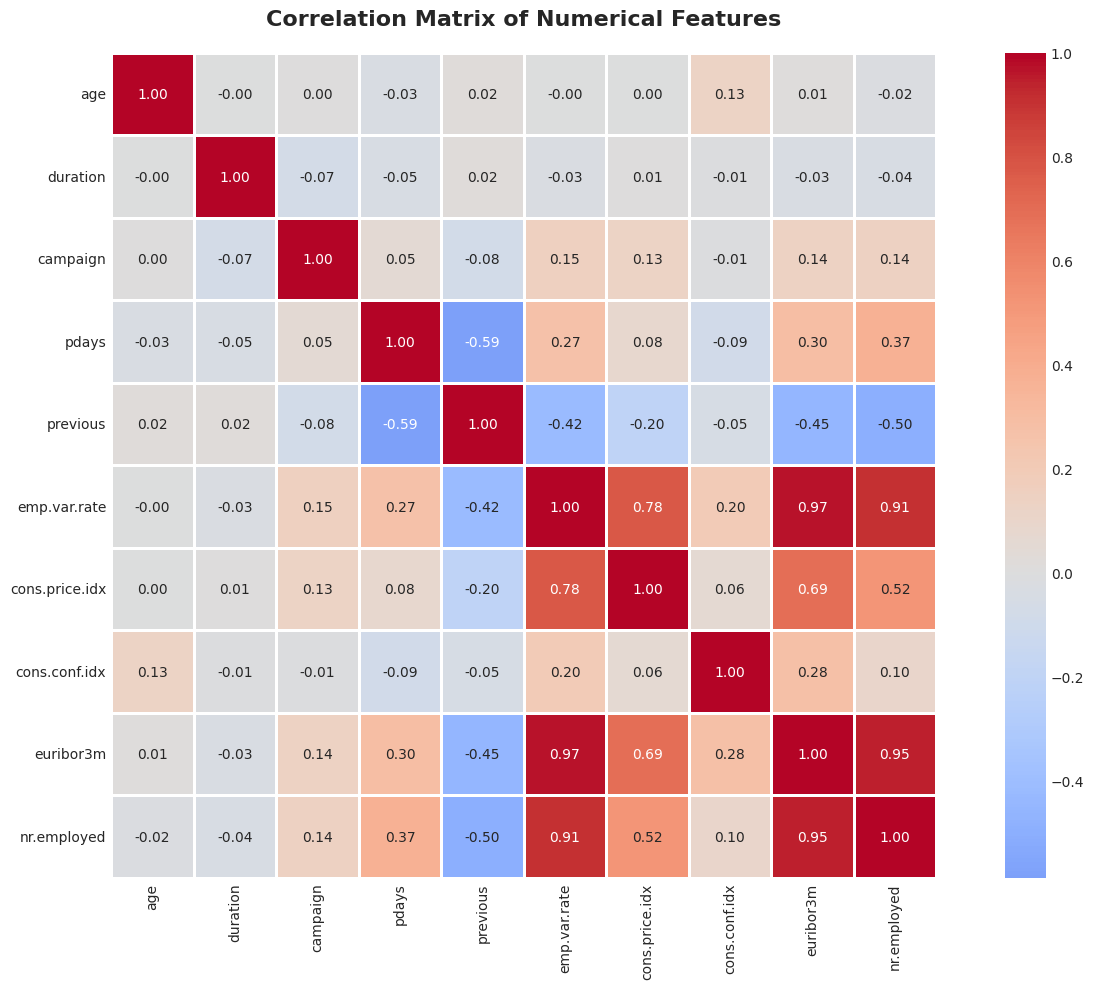


Highly Correlated Feature Pairs (|correlation| > 0.7):
emp.var.rate <-> cons.price.idx: 0.775
emp.var.rate <-> euribor3m: 0.972
emp.var.rate <-> nr.employed: 0.907
euribor3m <-> nr.employed: 0.945


In [12]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

if high_corr:
    for feat1, feat2, corr in high_corr:
        print(f"{feat1} <-> {feat2}: {corr:.3f}")
else:
    print("No highly correlated features found.")

## 6. Categorical Features Analysis

In [13]:
# Select categorical columns (excluding target)
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if col != 'y']
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

Categorical features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [14]:
# Value counts for each categorical feature
for col in categorical_cols:
    print(f"\n{col.upper()} - Unique values: {df[col].nunique()}")
    print(df[col].value_counts())
    print("-" * 50)


JOB - Unique values: 12
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
--------------------------------------------------

MARITAL - Unique values: 4
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64
--------------------------------------------------

EDUCATION - Unique values: 8
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64
--------------------------------------------------

DEFAULT - Unique values: 3
default
no         32588
unknown     8597
yes           

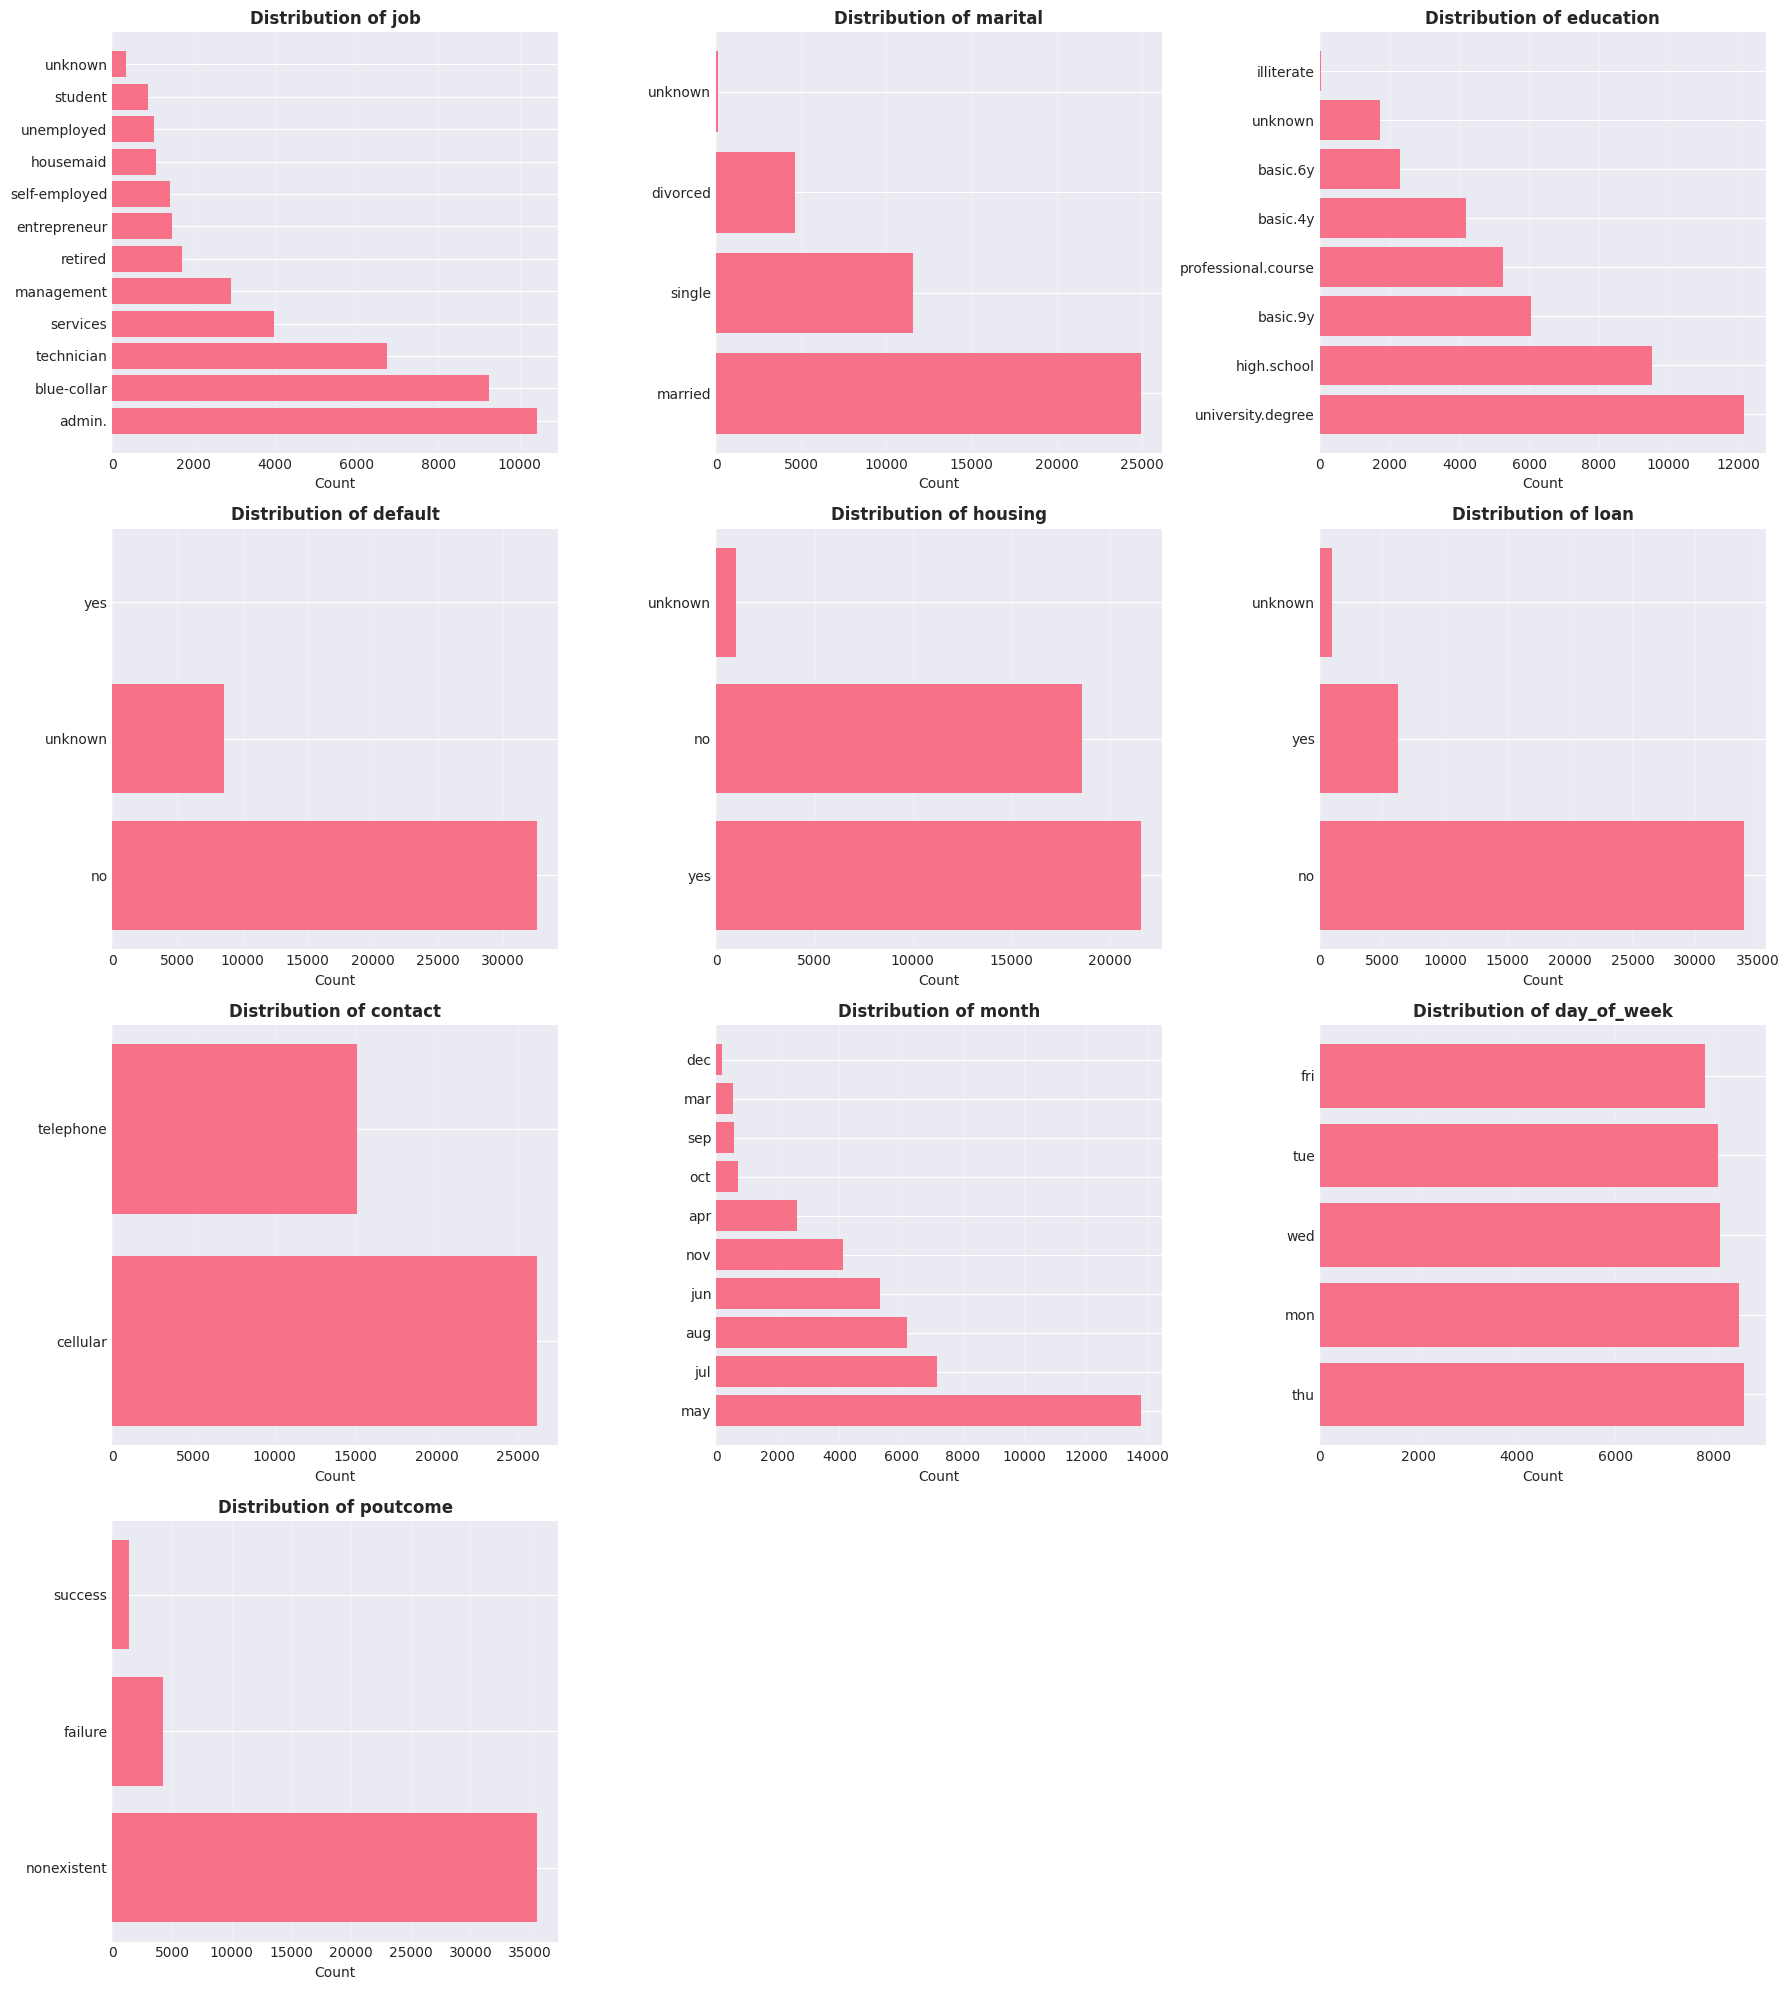

In [15]:
# Visualize categorical features
# Calculate number of rows needed (10 categorical features)
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].barh(range(len(value_counts)), value_counts.values)
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index)
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[idx].set_xlabel('Count')
    axes[idx].grid(True, alpha=0.3, axis='x')

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 7. Relationship between Features and Target

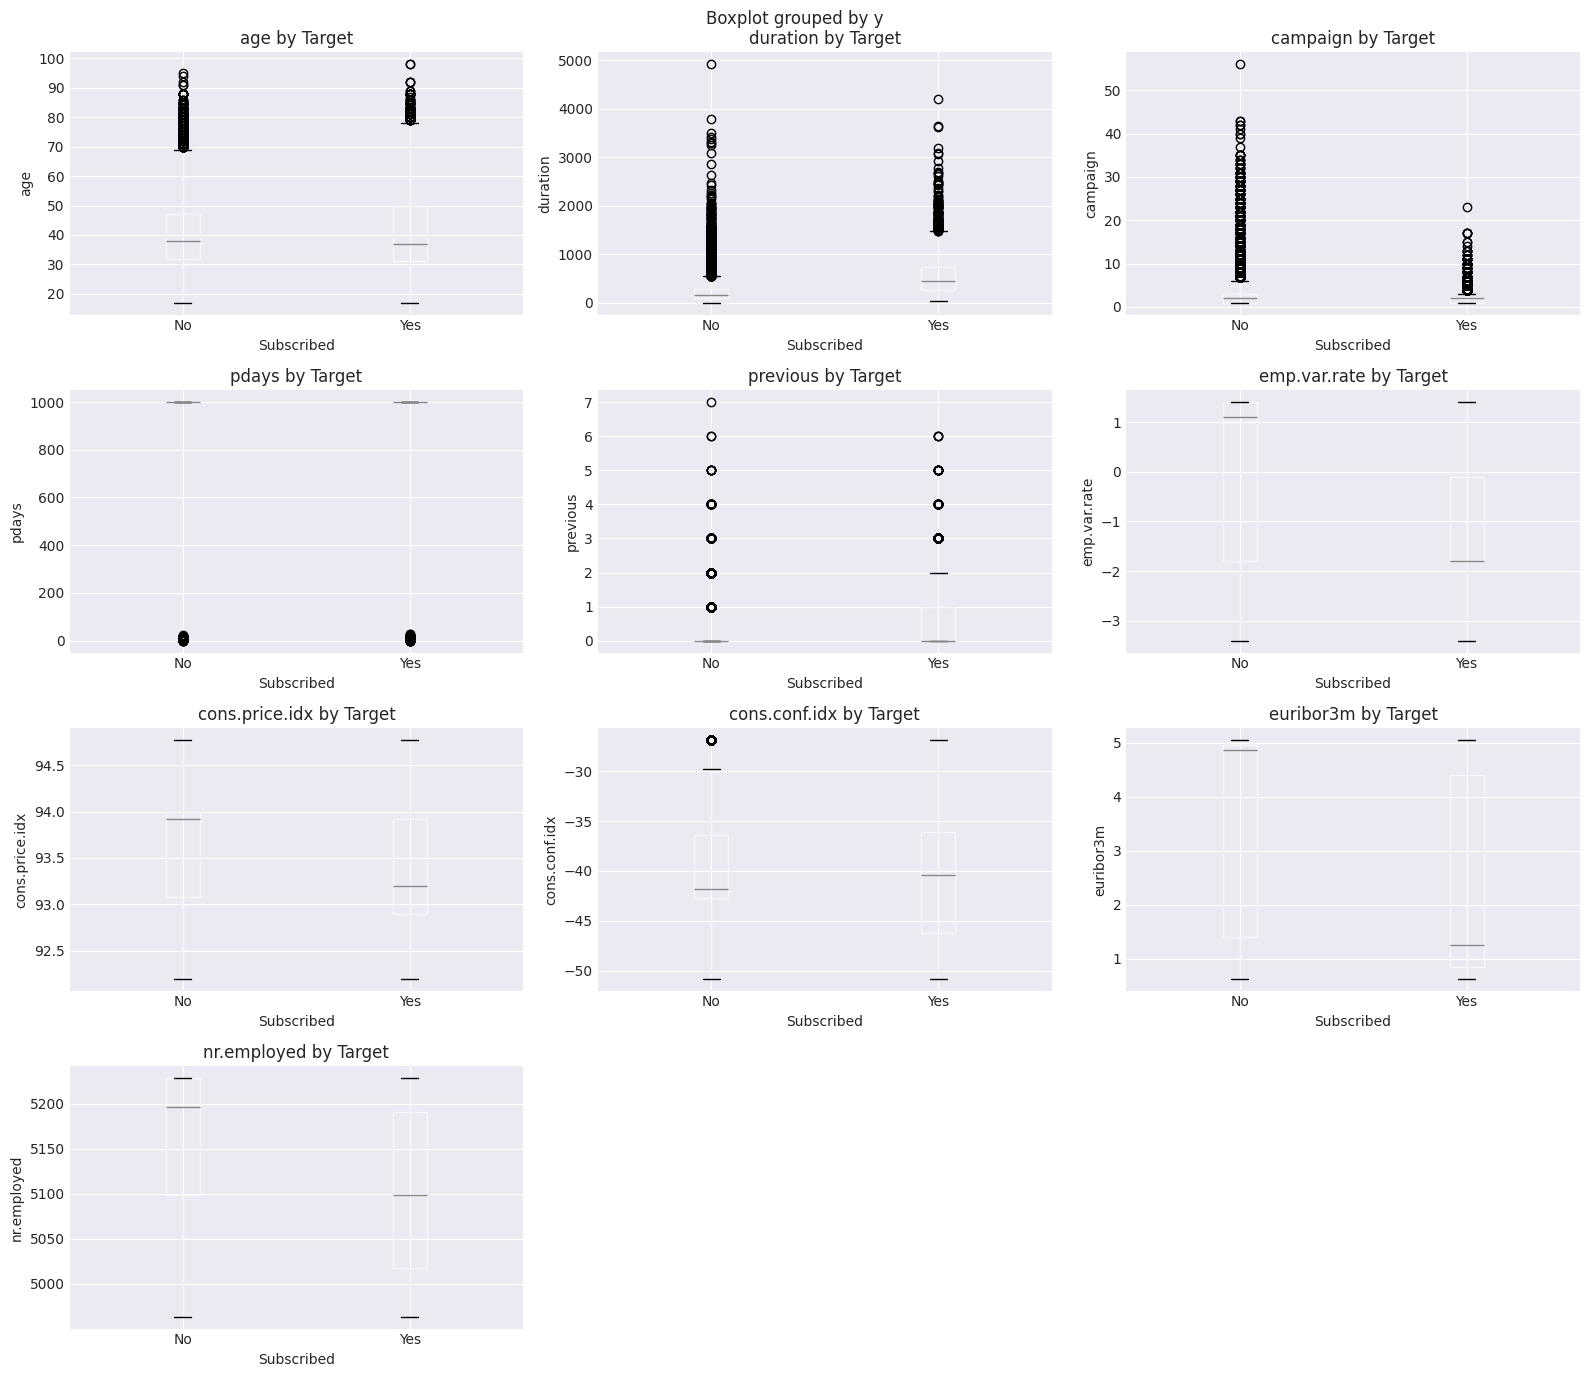

In [16]:
# Numerical features vs Target
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    df.boxplot(column=col, by='y', ax=axes[idx])
    axes[idx].set_title(f'{col} by Target')
    axes[idx].set_xlabel('Subscribed')
    axes[idx].set_ylabel(col)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])

# Hide extra subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

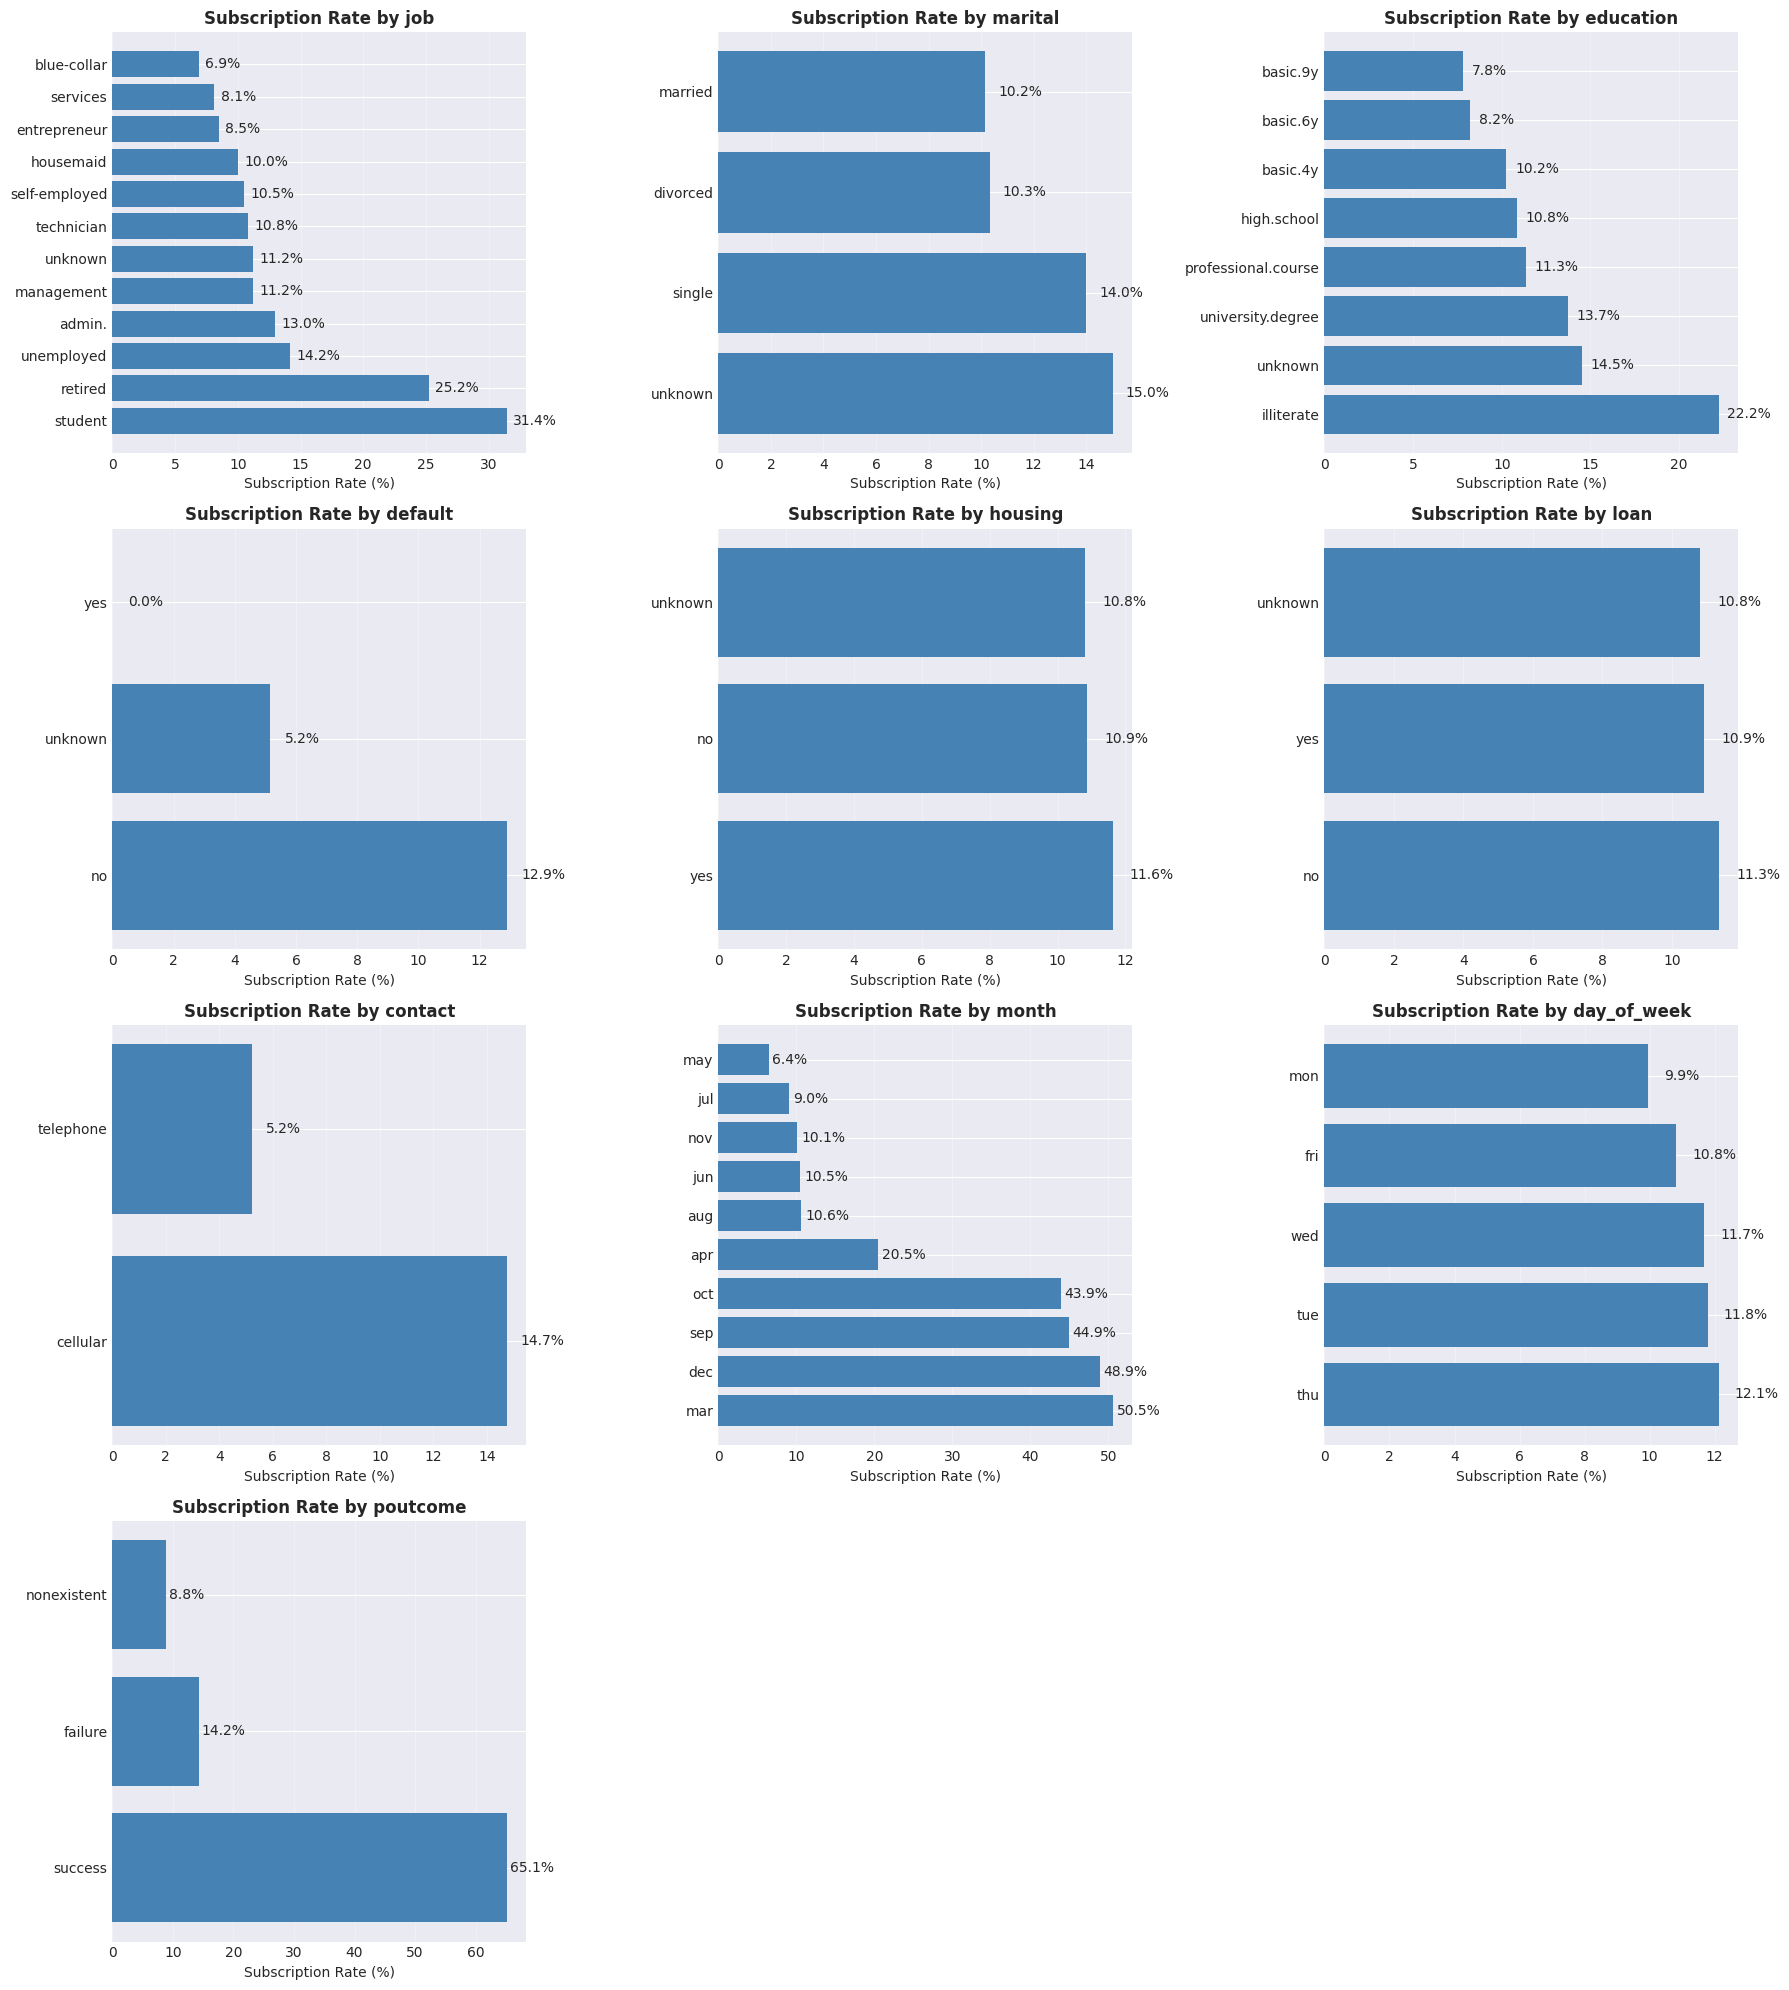

In [17]:
# Categorical features vs Target - Subscription rate by category
# Calculate number of rows needed (10 categorical features)
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    # Calculate subscription rate for each category
    subscription_rate = df.groupby(col)['y'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)
    subscription_rate = subscription_rate.sort_values(ascending=False)
    
    axes[idx].barh(range(len(subscription_rate)), subscription_rate.values, color='steelblue')
    axes[idx].set_yticks(range(len(subscription_rate)))
    axes[idx].set_yticklabels(subscription_rate.index)
    axes[idx].set_title(f'Subscription Rate by {col}', fontweight='bold')
    axes[idx].set_xlabel('Subscription Rate (%)')
    axes[idx].grid(True, alpha=0.3, axis='x')
    
    # Add percentage labels
    for i, v in enumerate(subscription_rate.values):
        axes[idx].text(v + 0.5, i, f'{v:.1f}%', va='center')

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [18]:
# Detailed cross-tabulation for key categorical features
for col in ['job', 'education', 'marital', 'poutcome']:
    print(f"\n{'='*60}")
    print(f"Cross-tabulation: {col.upper()} vs TARGET")
    print(f"{'='*60}")
    
    ct = pd.crosstab(df[col], df['y'], margins=True)
    ct_pct = pd.crosstab(df[col], df['y'], normalize='index') * 100
    
    print("\nCounts:")
    print(ct)
    print("\nPercentages (row-wise):")
    print(ct_pct.round(2))


Cross-tabulation: JOB vs TARGET

Counts:
y                 no   yes    All
job                              
admin.          9070  1352  10422
blue-collar     8616   638   9254
entrepreneur    1332   124   1456
housemaid        954   106   1060
management      2596   328   2924
retired         1286   434   1720
self-employed   1272   149   1421
services        3646   323   3969
student          600   275    875
technician      6013   730   6743
unemployed       870   144   1014
unknown          293    37    330
All            36548  4640  41188

Percentages (row-wise):
y                 no    yes
job                        
admin.         87.03  12.97
blue-collar    93.11   6.89
entrepreneur   91.48   8.52
housemaid      90.00  10.00
management     88.78  11.22
retired        74.77  25.23
self-employed  89.51  10.49
services       91.86   8.14
student        68.57  31.43
technician     89.17  10.83
unemployed     85.80  14.20
unknown        88.79  11.21

Cross-tabulation: EDUCATION vs

## 8. Duration Analysis (Important Note)

According to the dataset description:
> **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Duration Statistics by Target:
       count        mean         std   min    25%    50%     75%     max
y                                                                       
no   36548.0  220.844807  207.096293   0.0   95.0  163.5  279.00  4918.0
yes   4640.0  553.191164  401.171871  37.0  253.0  449.0  741.25  4199.0


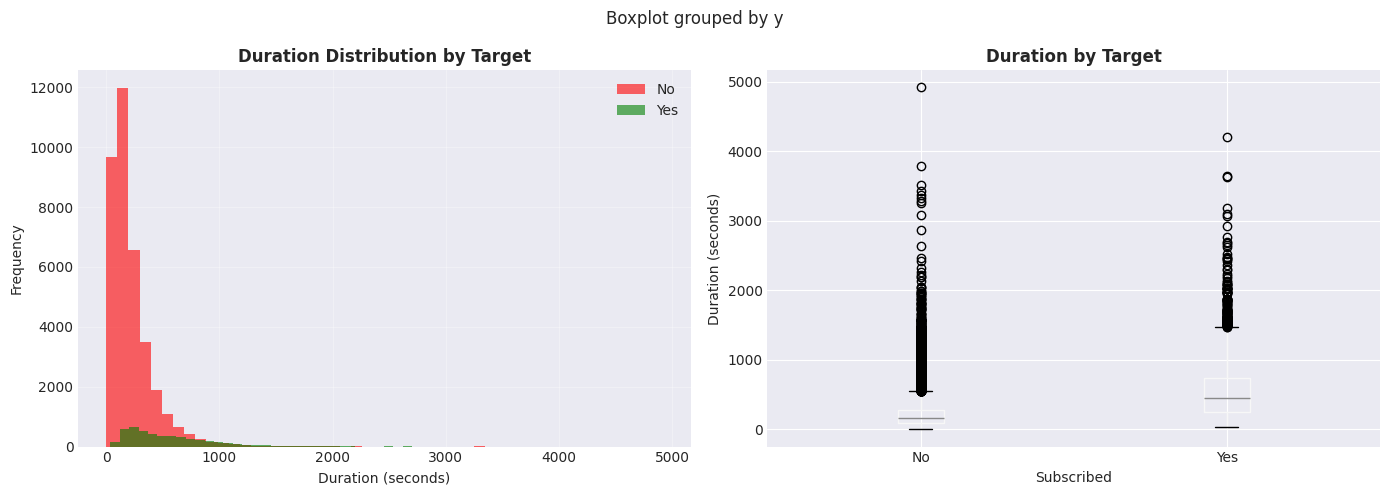


Rows with duration = 0: 4
Target distribution for duration = 0:
y
no    4
Name: count, dtype: int64


In [19]:
# Duration analysis
print("Duration Statistics by Target:")
print(df.groupby('y')['duration'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution by target
df[df['y'] == 'no']['duration'].hist(bins=50, alpha=0.6, label='No', ax=axes[0], color='red')
df[df['y'] == 'yes']['duration'].hist(bins=50, alpha=0.6, label='Yes', ax=axes[0], color='green')
axes[0].set_title('Duration Distribution by Target', fontweight='bold')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
df.boxplot(column='duration', by='y', ax=axes[1])
axes[1].set_title('Duration by Target', fontweight='bold')
axes[1].set_xlabel('Subscribed')
axes[1].set_ylabel('Duration (seconds)')
plt.sca(axes[1])
plt.xticks([1, 2], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# Duration = 0 analysis
zero_duration = (df['duration'] == 0).sum()
print(f"\nRows with duration = 0: {zero_duration}")
if zero_duration > 0:
    print("Target distribution for duration = 0:")
    print(df[df['duration'] == 0]['y'].value_counts())

## 9. Campaign Contact Analysis

Clients previously contacted: 5625 (13.66%)
Clients not previously contacted (pdays=999): 39673 (96.32%)


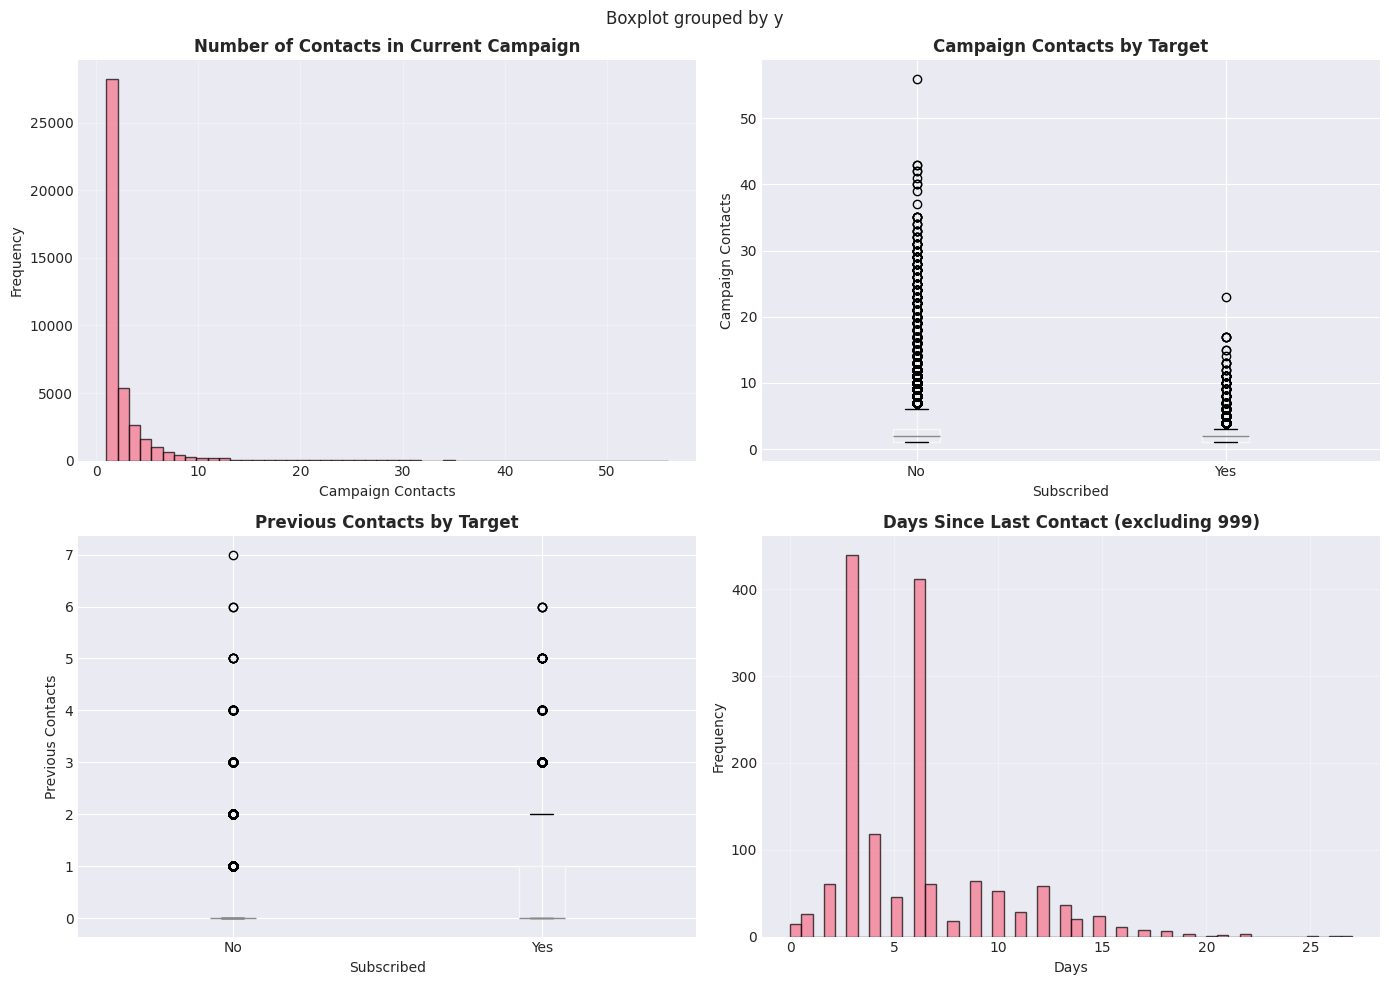

In [20]:
# Campaign, pdays, previous analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Campaign distribution
axes[0, 0].hist(df['campaign'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Number of Contacts in Current Campaign', fontweight='bold')
axes[0, 0].set_xlabel('Campaign Contacts')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# Campaign by target
df.boxplot(column='campaign', by='y', ax=axes[0, 1])
axes[0, 1].set_title('Campaign Contacts by Target', fontweight='bold')
axes[0, 1].set_xlabel('Subscribed')
axes[0, 1].set_ylabel('Campaign Contacts')
plt.sca(axes[0, 1])
plt.xticks([1, 2], ['No', 'Yes'])

# Previous contacts
previous_contacted = (df['previous'] > 0).sum()
print(f"Clients previously contacted: {previous_contacted} ({previous_contacted/len(df)*100:.2f}%)")

# Previous by target
df.boxplot(column='previous', by='y', ax=axes[1, 0])
axes[1, 0].set_title('Previous Contacts by Target', fontweight='bold')
axes[1, 0].set_xlabel('Subscribed')
axes[1, 0].set_ylabel('Previous Contacts')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['No', 'Yes'])

# Pdays analysis (999 = not previously contacted)
not_contacted = (df['pdays'] == 999).sum()
print(f"Clients not previously contacted (pdays=999): {not_contacted} ({not_contacted/len(df)*100:.2f}%)")

pdays_distribution = df[df['pdays'] != 999]['pdays'].hist(bins=50, ax=axes[1, 1], edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Days Since Last Contact (excluding 999)', fontweight='bold')
axes[1, 1].set_xlabel('Days')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Social and Economic Context Features

In [21]:
# Social/Economic features
socioeconomic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

print("Social and Economic Features Statistics:")
print(df[socioeconomic_features].describe())

# Correlation with target (convert target to binary)
df_temp = df.copy()
df_temp['y_binary'] = (df_temp['y'] == 'yes').astype(int)

print("\nCorrelation with Target:")
for feature in socioeconomic_features:
    corr = df_temp[feature].corr(df_temp['y_binary'])
    print(f"{feature}: {corr:.4f}")

Social and Economic Features Statistics:
       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911
std        1.570960        0.578840       4.628198      1.734447     72.251528
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Correlation with Target:
emp.var.rate: -0.2983
cons.price.idx: -0.1362
cons.conf.idx: 0.0549
euribor3m: -0.3078
nr.employed: -0.3547


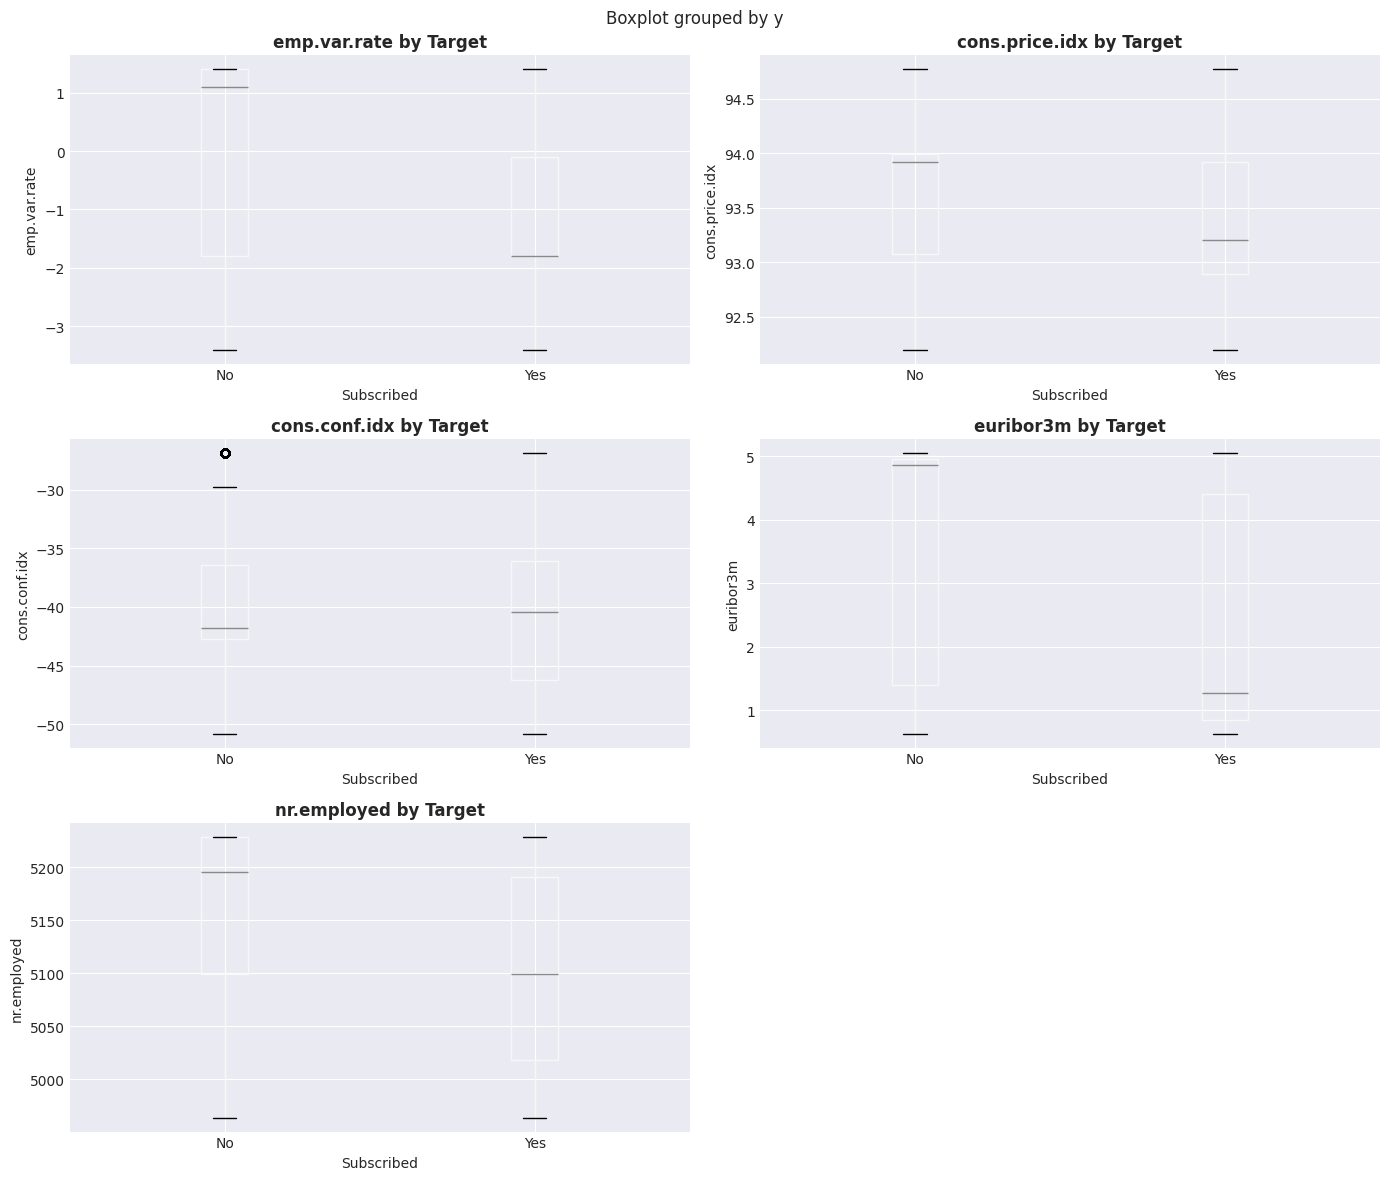

In [22]:
# Visualize socioeconomic features
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, feature in enumerate(socioeconomic_features):
    df.boxplot(column=feature, by='y', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Target', fontweight='bold')
    axes[idx].set_xlabel('Subscribed')
    axes[idx].set_ylabel(feature)
    plt.sca(axes[idx])
    plt.xticks([1, 2], ['No', 'Yes'])

# Hide extra subplot
axes[5].set_visible(False)

plt.tight_layout()
plt.show()

## 11. Time-based Analysis

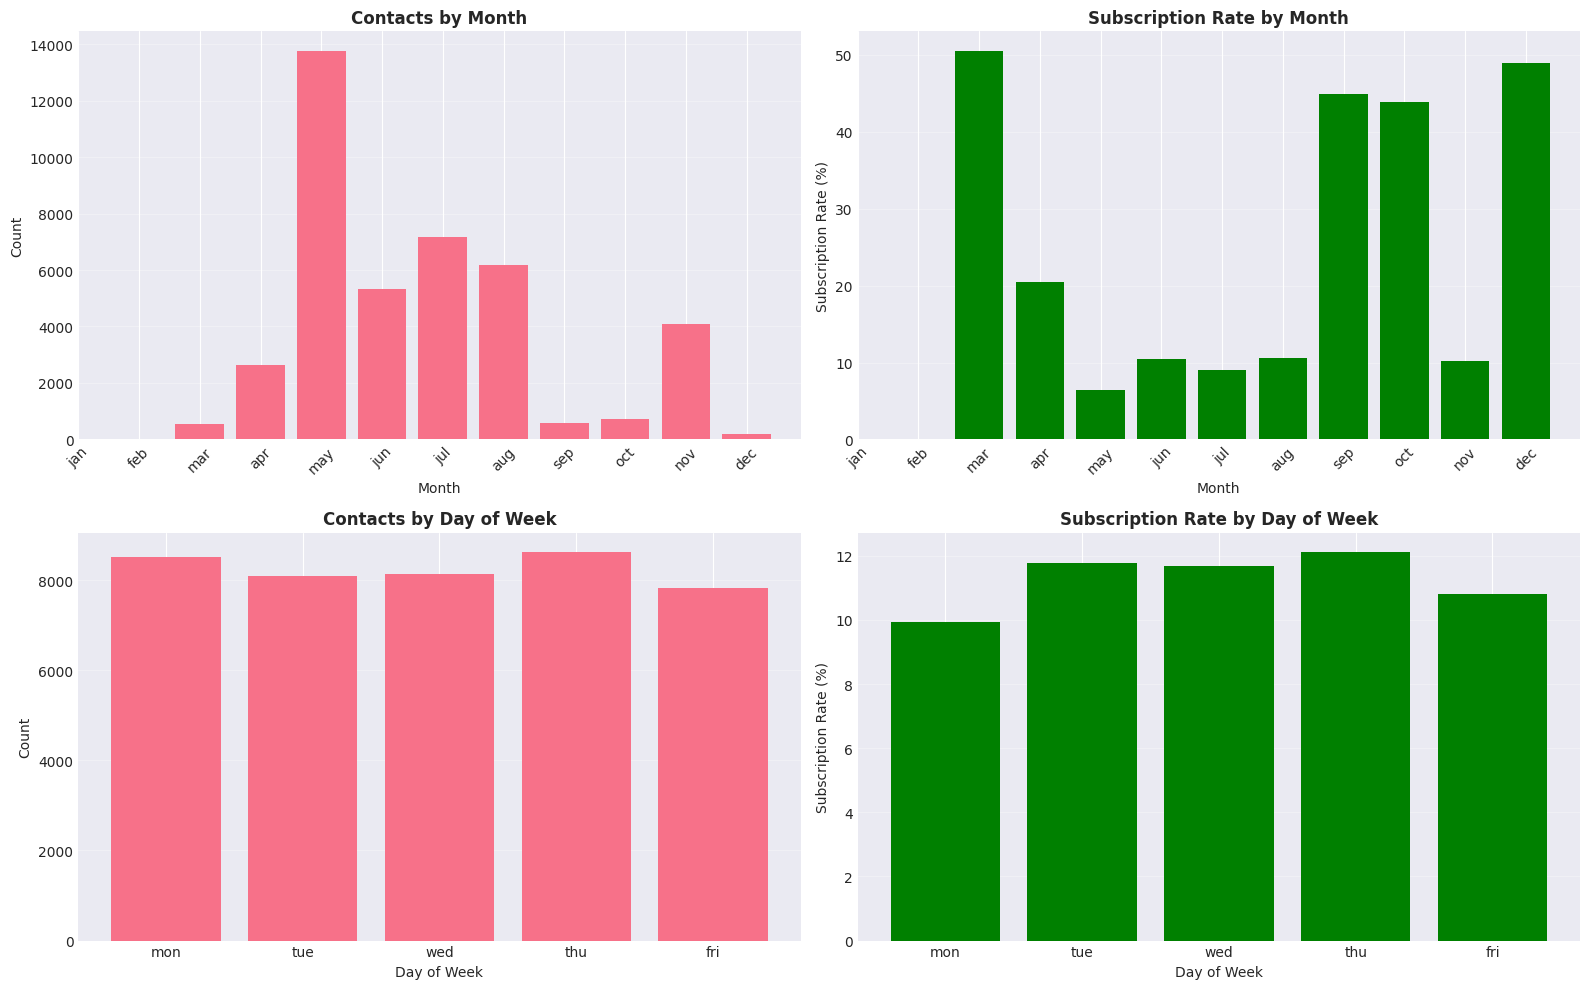

In [23]:
# Month and day_of_week analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Month distribution
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_counts = df['month'].value_counts().reindex(month_order)
axes[0, 0].bar(range(len(month_counts)), month_counts.values)
axes[0, 0].set_xticks(range(len(month_counts)))
axes[0, 0].set_xticklabels(month_counts.index, rotation=45)
axes[0, 0].set_title('Contacts by Month', fontweight='bold')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Count')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Month subscription rate
month_sub_rate = df.groupby('month')['y'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)
month_sub_rate = month_sub_rate.reindex(month_order)
axes[0, 1].bar(range(len(month_sub_rate)), month_sub_rate.values, color='green')
axes[0, 1].set_xticks(range(len(month_sub_rate)))
axes[0, 1].set_xticklabels(month_sub_rate.index, rotation=45)
axes[0, 1].set_title('Subscription Rate by Month', fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Subscription Rate (%)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Day of week distribution
dow_order = ['mon', 'tue', 'wed', 'thu', 'fri']
dow_counts = df['day_of_week'].value_counts().reindex(dow_order)
axes[1, 0].bar(range(len(dow_counts)), dow_counts.values)
axes[1, 0].set_xticks(range(len(dow_counts)))
axes[1, 0].set_xticklabels(dow_counts.index)
axes[1, 0].set_title('Contacts by Day of Week', fontweight='bold')
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Day of week subscription rate
dow_sub_rate = df.groupby('day_of_week')['y'].apply(lambda x: (x == 'yes').sum() / len(x) * 100)
dow_sub_rate = dow_sub_rate.reindex(dow_order)
axes[1, 1].bar(range(len(dow_sub_rate)), dow_sub_rate.values, color='green')
axes[1, 1].set_xticks(range(len(dow_sub_rate)))
axes[1, 1].set_xticklabels(dow_sub_rate.index)
axes[1, 1].set_title('Subscription Rate by Day of Week', fontweight='bold')
axes[1, 1].set_xlabel('Day of Week')
axes[1, 1].set_ylabel('Subscription Rate (%)')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 12. Key Insights Summary

In [24]:
print("="*70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*70)

# 1. Dataset overview
print("\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df):,}")
print(f"   - Features: {df.shape[1]} (20 input + 1 target)")
print(f"   - Target distribution: {(df['y'] == 'no').sum():,} No ({(df['y'] == 'no').sum()/len(df)*100:.1f}%), "
      f"{(df['y'] == 'yes').sum():,} Yes ({(df['y'] == 'yes').sum()/len(df)*100:.1f}%)")
print(f"   - Class imbalance: Significant (ratio ~{class_ratio:.1f}:1)")

# 2. Missing values
print("\n2. DATA QUALITY:")
print(f"   - No missing values (NaN)")
print(f"   - 'Unknown' values present in categorical features")

# 3. Important features
print("\n3. NOTABLE PATTERNS:")
print("   - Duration is highly predictive but should not be used for realistic models")
print("   - Previous campaign outcome (poutcome) shows strong relationship with target")
print("   - Social/economic indicators show correlation with subscription rates")
print("   - Contact timing (month, day_of_week) affects subscription rates")

# 4. Feature types
print("\n4. FEATURE CATEGORIES:")
print(f"   - Client demographics: age, job, marital, education, default, housing, loan")
print(f"   - Campaign contact info: contact, month, day_of_week, duration, campaign")
print(f"   - Previous campaign: pdays, previous, poutcome")
print(f"   - Social/Economic: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed")

print("\n" + "="*70)

KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

1. DATASET OVERVIEW:
   - Total samples: 41,188
   - Features: 21 (20 input + 1 target)
   - Target distribution: 36,548 No (88.7%), 4,640 Yes (11.3%)
   - Class imbalance: Significant (ratio ~7.9:1)

2. DATA QUALITY:
   - No missing values (NaN)
   - 'Unknown' values present in categorical features

3. NOTABLE PATTERNS:
   - Duration is highly predictive but should not be used for realistic models
   - Previous campaign outcome (poutcome) shows strong relationship with target
   - Social/economic indicators show correlation with subscription rates
   - Contact timing (month, day_of_week) affects subscription rates

4. FEATURE CATEGORIES:
   - Client demographics: age, job, marital, education, default, housing, loan
   - Campaign contact info: contact, month, day_of_week, duration, campaign
   - Previous campaign: pdays, previous, poutcome
   - Social/Economic: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed



## 13. Recommendations for Modeling

Based on the exploratory analysis:

1. **Handle Class Imbalance**: Use techniques like SMOTE, class weights, or stratified sampling
2. **Feature Engineering**: 
   - Consider grouping rare categories in categorical features
   - Create interaction features between campaign and previous campaign info
   - Handle 'unknown' values appropriately
3. **Duration Feature**: Exclude from realistic predictive models
4. **Feature Scaling**: Required for numerical features (different scales)
5. **Encoding**: Apply one-hot or label encoding for categorical variables
6. **Model Selection**: Try ensemble methods (Random Forest, XGBoost) given mixed feature types
7. **Evaluation Metrics**: Use precision, recall, F1-score, and AUC-ROC (not just accuracy due to imbalance)